In [13]:
#xor perceptron:
import numpy as np
from numpy import random
from random import randint

def binary (x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    
def sigmoid (x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative (x):
     return np.exp(-x) / (1 + np.exp(-x)) ** 2

pattern = [[0,0], [0,1], [1,0], [1,1]]
x = np.asarray(pattern)
y = [0, 1, 1, 0]
# random weight 
rand1 = np.random.randint(0, 10, (1, 6))
rand2 = np.random.randint(-10, 0, (1, 2))
w00 = rand1[0][0]
w01 = rand1[0][1]
w02 = rand1[0][2]
w03 = rand1[0][3]
w04 = rand1[0][4]
w05 = rand1[0][5]
w11 = rand2[0][0]
w12 = rand2[0][1]

error = np.zeros(10)
learning_rate = 0.01
# modify the weights until error == 0
while True:
    for i in range(len(x)):
        x1, x2 =  x[i][0], x[i][1]
        y_true = y[i]
        s1 = w00 + x1 * w02 + x2 * w04
        a1 = sigmoid(s1)
        s2 = w01 + x1 * w03 + x2 * w05
        a2 = sigmoid(s2)
        s3 = a1 * w11 + a2 * w12
        y_act = binary(s3)
        error[i] = y_true - y_act 
        if error[i] != 0 : 
            pass
            # modifying the weights 
            w11 += learning_rate * error[i] *  a1
            w12 += learning_rate * error[i] *  a2           
            w00 += learning_rate * (w11 * error[i]) * sigmoid_derivative(s1) * 1
            w01 += learning_rate * (w12 * error[i]) * sigmoid_derivative(s2) * 1
            w02 += learning_rate * (w11 * error[i]) * sigmoid_derivative(s1) * x1
            w03 += learning_rate * (w12 * error[i]) * sigmoid_derivative(s2) * x1
            w04 += learning_rate * (w11 * error[i]) * sigmoid_derivative(s1) * x2
            w05 += learning_rate * (w12 * error[i]) * sigmoid_derivative(s2) * x2
    if np.all((error == 0)):  
        print("w00:", w00)
        print("w01:", w01)
        print("w02:", w02)
        print("w03:", w03)
        print("w04:", w04)
        print("w05:", w05)
        print("-----------------------")
        print("w11:", w11)
        print("w12:", w12)  
        break  

w00: 2.904876107732124
w01: 3.0787530069339692
w02: 1.6786195016060426
w03: 4.320964748736514
w04: 1.4266527598156657
w05: 6.997238147949265
-----------------------
w11: -2.702776322239925
w12: 2.6770893633357282


In [14]:
#and perceptron:
import numpy as np

def activation (net):
    if net >= 0:
        return 1
    elif net < 0:
        return 0

pattern = [[0,0], [0,1], [1,0], [1,1]]
p = np.asarray(pattern)
y_true = [0, 0, 0, 1]
# rendon weight 
w = np.random.rand(1,3) * 10
w1 = np.round(w[0][0], 1)
w2 = np.round(w[0][1], 1)
w3 = np.round(w[0][2], 1)
error = np.zeros(10)
learning_rate = 0.05
# modify the weights until error == 0
while True:
    for i in range(len(p)):
        y_act = w1 * p[i][0] + w2 * p[i][1] + w3 
        y_act = activation(y_act)
        error[i] = y_true[i] - y_act 
        if error[i] != 0 :
            # modifying the weights 
            w1 = w1 + learning_rate * error[i] * p[i][0]
            w2 = w2 + learning_rate * error[i] * p[i][1]
            w3 = w3 + learning_rate * error[i] 
    if np.all((error == 0)): 
        # final weights 
        print([[w1, w2, w3]])
        break

[[4.399999999999996, 3.750000000000015, -4.449999999999976]]


------- layer 0 -------
weight.shape  ()
bias.shape  ()
------- layer 1 -------
weight.shape  (20, 10)
bias.shape  (20, 1)
------- layer 2 -------
weight.shape  (30, 20)
bias.shape  (30, 1)
------- layer 3 -------
weight.shape  (2, 30)
bias.shape  (2, 1)


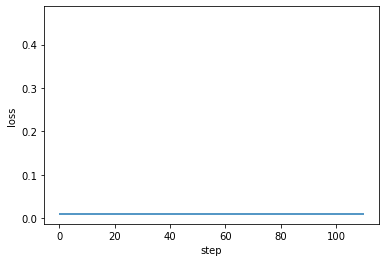

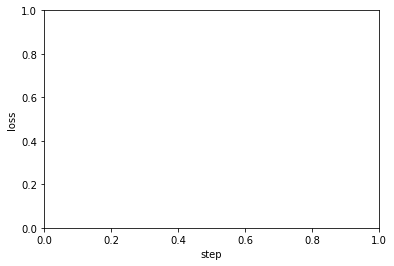

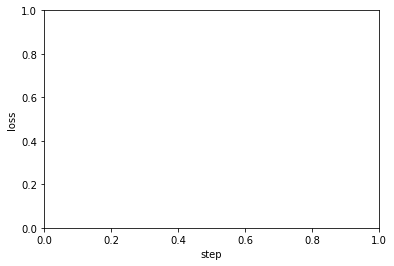

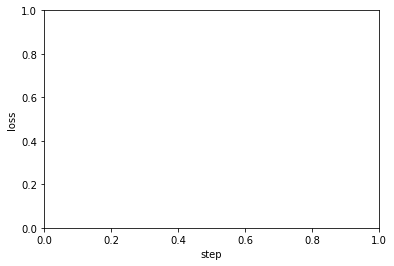

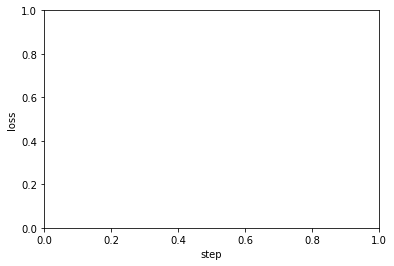

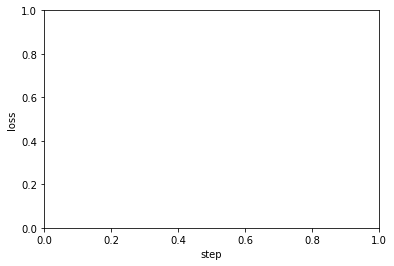

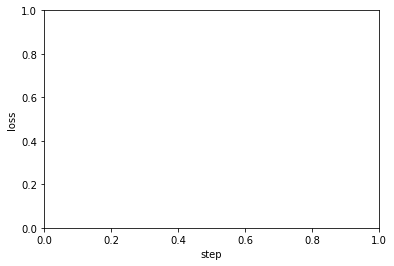

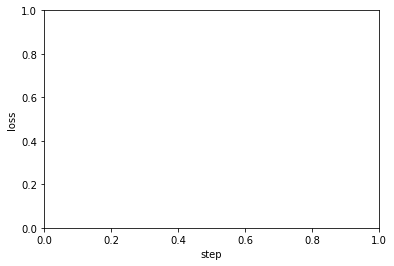

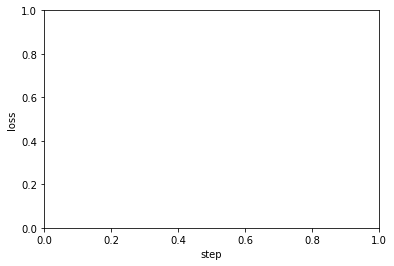

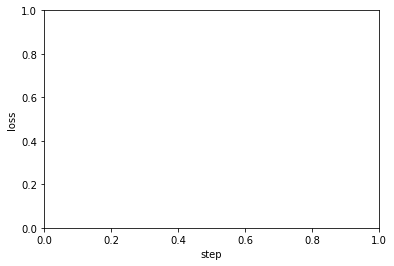

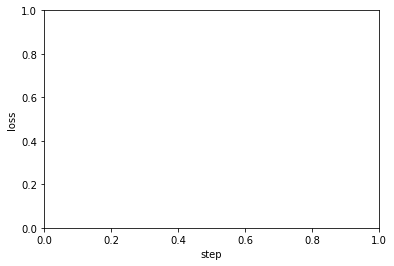

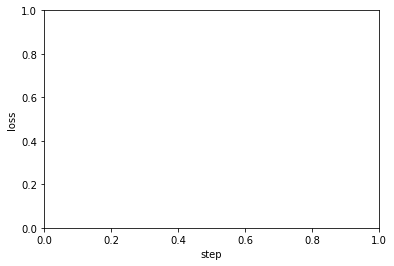

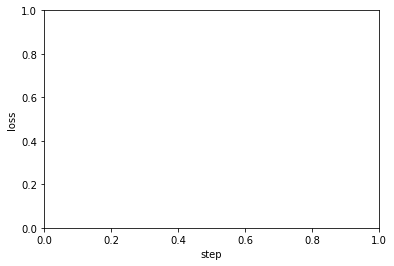

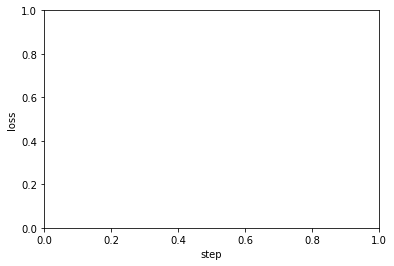

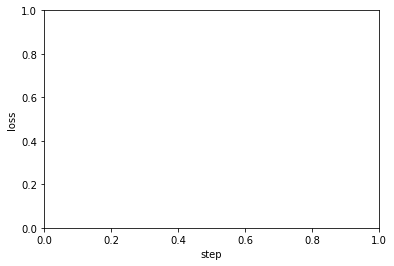

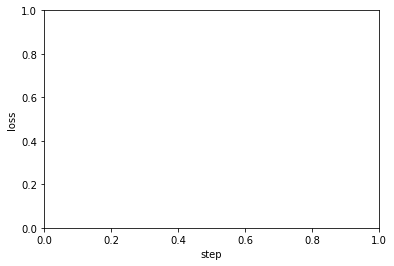

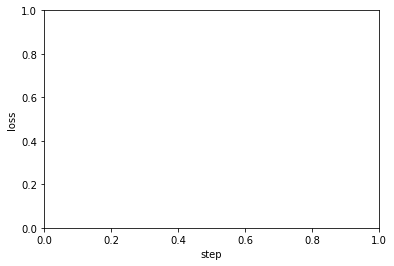

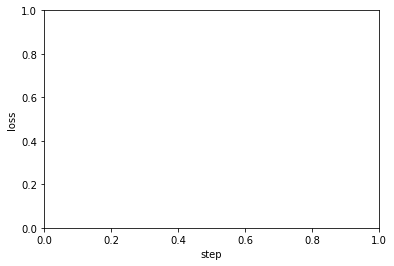

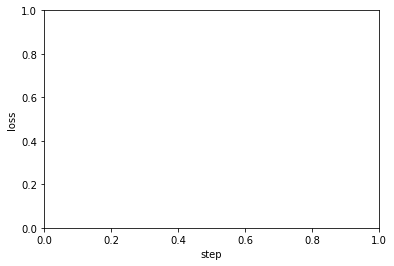

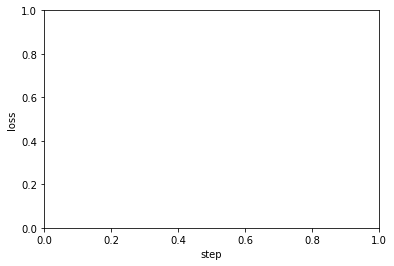

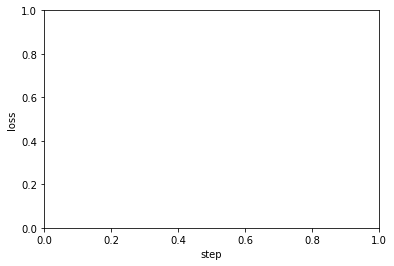

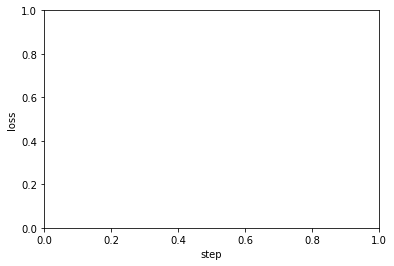

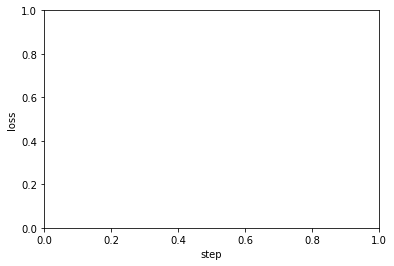

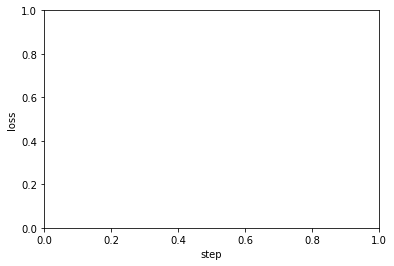

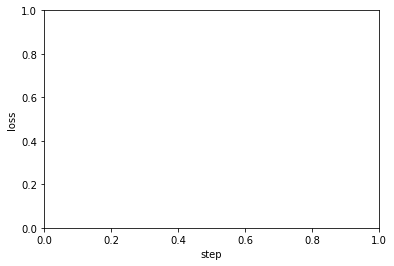

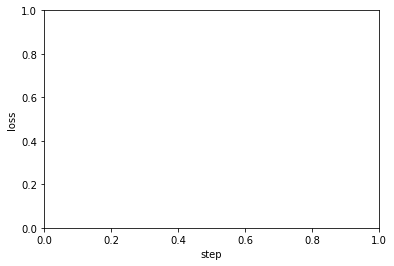

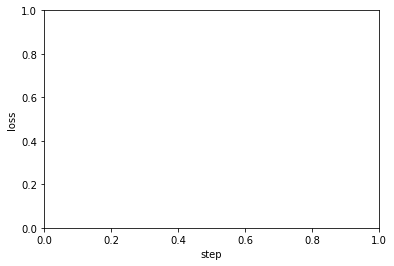

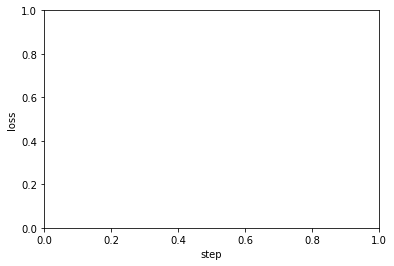

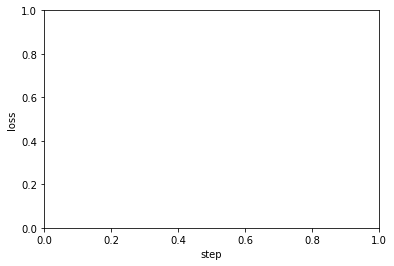

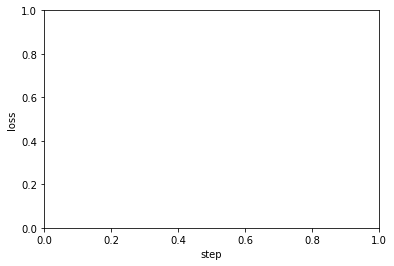

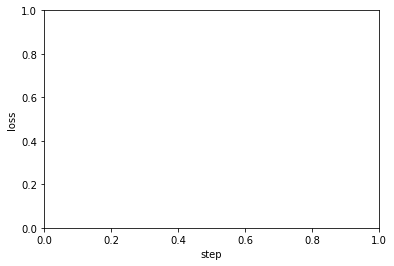

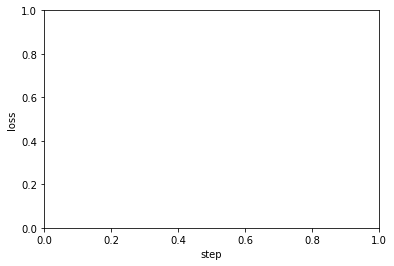

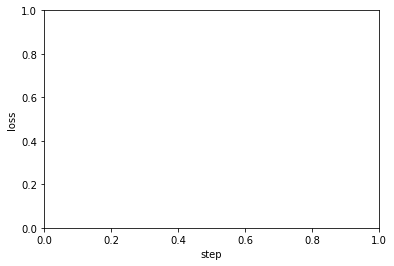

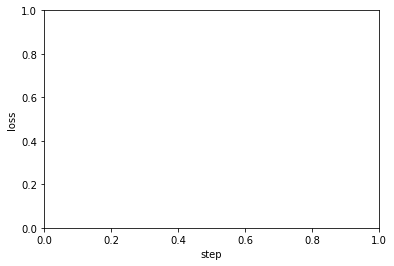

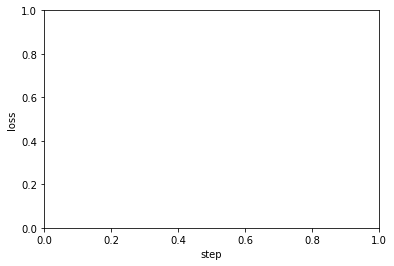

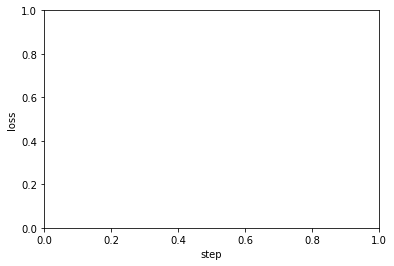

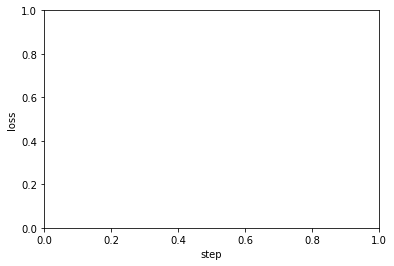

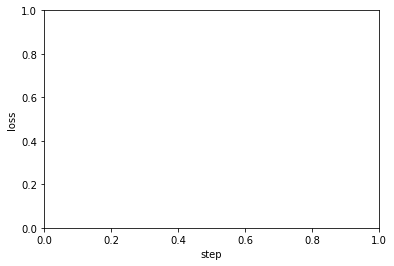

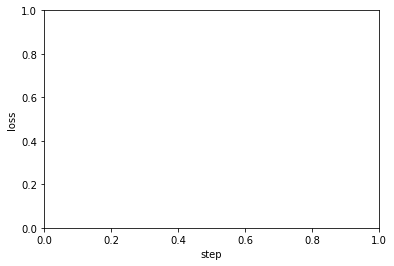

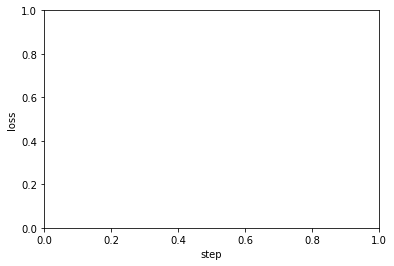

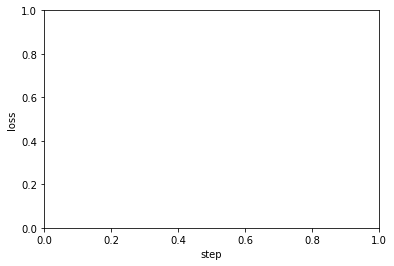

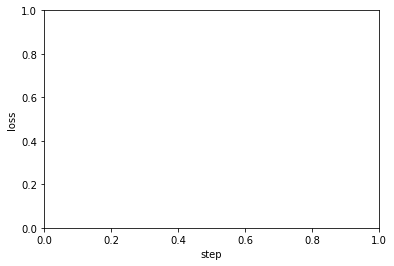

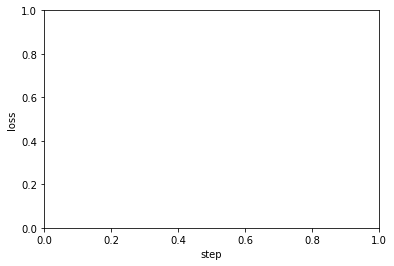

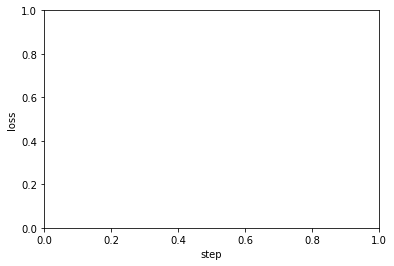

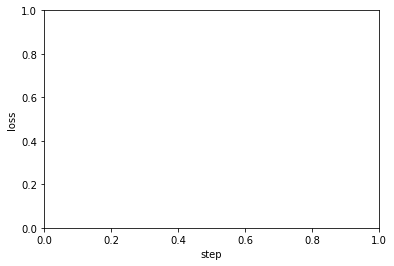

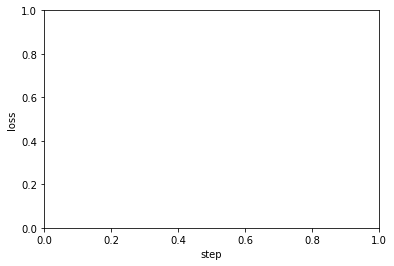

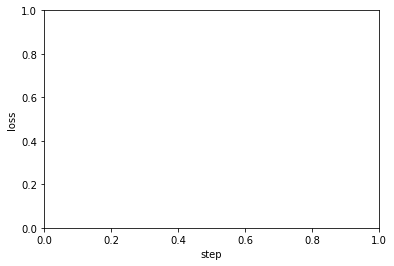

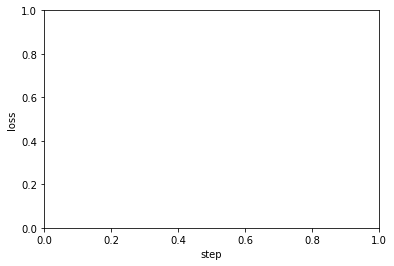

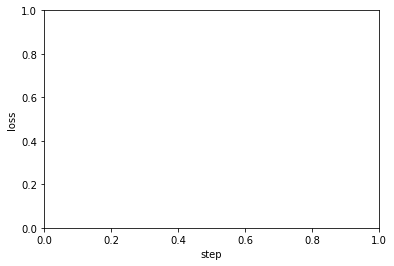

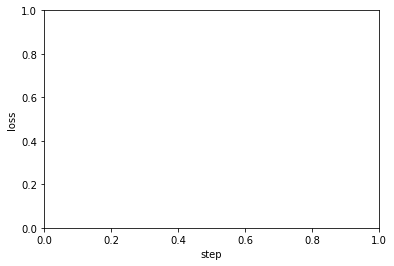

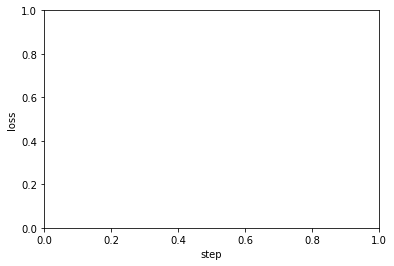

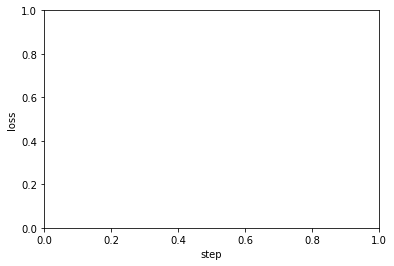

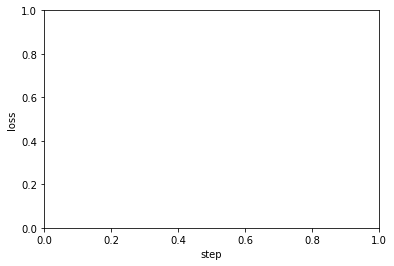

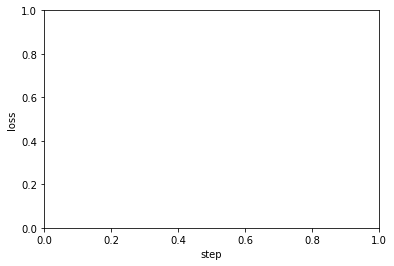

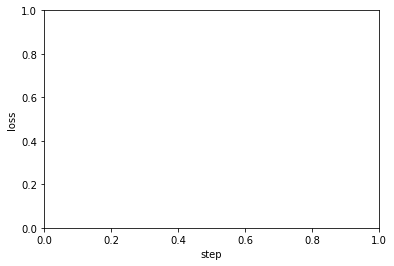

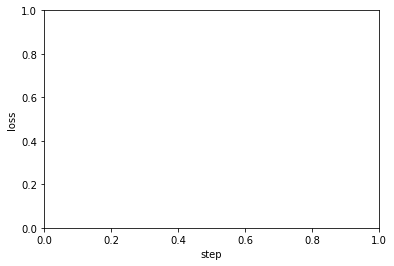

----达到精度----


In [15]:
#backpropagation neural network
import numpy as np
from matplotlib import pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))


class DenseLayer:
    """
    Layers of BP neural network
    """

    def __init__(
        self, units, activation=None, learning_rate=None, is_input_layer=False
    ):
        """
        common connected layer of bp network
        :param units: numbers of neural units
        :param activation: activation function
        :param learning_rate: learning rate for paras
        :param is_input_layer: whether it is input layer or not
        """
        self.units = units
        self.weight = None
        self.bias = None
        self.activation = activation
        if learning_rate is None:
            learning_rate = 0.3
        self.learn_rate = learning_rate
        self.is_input_layer = is_input_layer

    def initializer(self, back_units):
        self.weight = np.asmatrix(np.random.normal(0, 0.5, (self.units, back_units)))
        self.bias = np.asmatrix(np.random.normal(0, 0.5, self.units)).T
        if self.activation is None:
            self.activation = sigmoid

    def cal_gradient(self):
        # activation function may be sigmoid or linear
        if self.activation == sigmoid:
            gradient_mat = np.dot(self.output, (1 - self.output).T)
            gradient_activation = np.diag(np.diag(gradient_mat))
        else:
            gradient_activation = 1
        return gradient_activation

    def forward_propagation(self, xdata):
        self.xdata = xdata
        if self.is_input_layer:
            # input layer
            self.wx_plus_b = xdata
            self.output = xdata
            return xdata
        else:
            self.wx_plus_b = np.dot(self.weight, self.xdata) - self.bias
            self.output = self.activation(self.wx_plus_b)
            return self.output

    def back_propagation(self, gradient):
        gradient_activation = self.cal_gradient()  # i * i 维
        gradient = np.asmatrix(np.dot(gradient.T, gradient_activation))

        self._gradient_weight = np.asmatrix(self.xdata)
        self._gradient_bias = -1
        self._gradient_x = self.weight

        self.gradient_weight = np.dot(gradient.T, self._gradient_weight.T)
        self.gradient_bias = gradient * self._gradient_bias
        self.gradient = np.dot(gradient, self._gradient_x).T
        # upgrade: the Negative gradient direction
        self.weight = self.weight - self.learn_rate * self.gradient_weight
        self.bias = self.bias - self.learn_rate * self.gradient_bias.T
        # updates the weights and bias according to learning rate (0.3 if undefined)
        return self.gradient


class BPNN:
    """
    Back Propagation Neural Network model
    """

    def __init__(self):
        self.layers = []
        self.train_mse = []
        self.fig_loss = plt.figure()
        self.ax_loss = self.fig_loss.add_subplot(1, 1, 1)

    def add_layer(self, layer):
        self.layers.append(layer)

    def build(self):
        for i, layer in enumerate(self.layers[:]):
            if i < 1:
                layer.is_input_layer = True
            else:
                layer.initializer(self.layers[i - 1].units)

    def summary(self):
        for i, layer in enumerate(self.layers[:]):
            print("------- layer %d -------" % i)
            print("weight.shape ", np.shape(layer.weight))
            print("bias.shape ", np.shape(layer.bias))

    def train(self, xdata, ydata, train_round, accuracy):
        self.train_round = train_round
        self.accuracy = accuracy

        self.ax_loss.hlines(self.accuracy, 0, self.train_round * 1.1)

        x_shape = np.shape(xdata)
        for round_i in range(train_round):
            all_loss = 0
            for row in range(x_shape[0]):
                _xdata = np.asmatrix(xdata[row, :]).T
                _ydata = np.asmatrix(ydata[row, :]).T

                # forward propagation
                for layer in self.layers:
                    _xdata = layer.forward_propagation(_xdata)

                loss, gradient = self.cal_loss(_ydata, _xdata)
                all_loss = all_loss + loss

                # back propagation: the input_layer does not upgrade
                for layer in self.layers[:0:-1]:
                    gradient = layer.back_propagation(gradient)

            mse = all_loss / x_shape[0]
            self.train_mse.append(mse)

            self.plot_loss()

            if mse < self.accuracy:
                print("--------")
                return mse

    def cal_loss(self, ydata, ydata_):
        self.loss = np.sum(np.power((ydata - ydata_), 2))
        self.loss_gradient = 2 * (ydata_ - ydata)
        # vector (shape is the same as _ydata.shape)
        return self.loss, self.loss_gradient

    def plot_loss(self):
        if self.ax_loss.lines:
            self.ax_loss.lines.remove(self.ax_loss.lines[0])
        self.ax_loss.plot(self.train_mse, "r-")
        plt.ion()
        plt.xlabel("step")
        plt.ylabel("loss")
        plt.show()
        plt.pause(0.1)


def example():
    x = np.random.randn(10, 10)
    y = np.asarray(
        [
            [0.8, 0.4],
            [0.4, 0.3],
            [0.34, 0.45],
            [0.67, 0.32],
            [0.88, 0.67],
            [0.78, 0.77],
            [0.55, 0.66],
            [0.55, 0.43],
            [0.54, 0.1],
            [0.1, 0.5],
        ]
    )
    model = BPNN()
    for i in (10, 20, 30, 2):
        model.add_layer(DenseLayer(i))
    model.build()
    model.summary()
    model.train(xdata=x, ydata=y, train_round=100, accuracy=0.01)


if __name__ == "__main__":
    example()

(100,)
(100,)
(100, 1)
(100, 1)
[[0.45045765]]
0.3653609250790711


Text(0, 0.5, 'Weight')

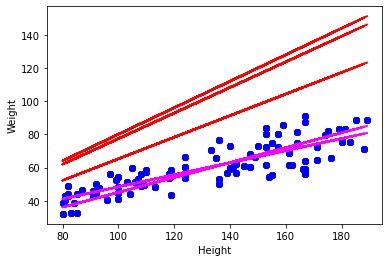

In [16]:
#adaline regression:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from numpy.linalg import inv

# generate data function

def generate_data(N):
    
    Height = np.random.randint(80, 190, size=N)
    m = np.random.uniform(0.3, 0.5, N)
    b = np.random.uniform(5, 10, N)

    Weight = Height * m + b 

    return Height, Weight

N = 100
Height, Weight =  generate_data(N)

print(Height.shape)
print(Weight.shape)

#reshape data

X = Height.reshape(-1, 1)
Y = Weight.reshape(-1, 1)

print(X.shape)
print(Y.shape)

plt.scatter(X, Y, c='blue')

plt.xlabel('Height')
plt.ylabel('Weight')

M = np.random.uniform(0.5, 0.9, 3)
# print(M)

plt.scatter(X, Y,c='blue')
plt.xlabel('Height')
plt.ylabel('Weight')

for m in M:
    y_pred = np.matmul(X, [m])    
    plt.plot(X, y_pred, c='red', lw=2)

# m = (XT. X)^-1 * XTY

m = np.matmul(np.linalg.inv(np.matmul(X.T, X)),  np.matmul(X.T, Y))
print(m)
y_pred = np.matmul(X, m)
# print(y_pred)
plt.scatter(X, Y, c='blue')
plt.plot(X, y_pred, c='magenta', lw=2)
plt.xlabel('Height')
plt.ylabel('Weight')

from scipy.stats import linregress

result  = linregress(X[:, 0], Y[:, 0])
print(result.slope)
y_pred = result.intercept + np.matmul(X, np.array([[result.slope]]))
# print(y_pred)
plt.scatter(X, Y, c = 'blue')
plt.plot(X, y_pred, c='magenta', lw = 2)
plt.xlabel('Height')
plt.ylabel('Weight')


(200,)
(200,)
(200, 1)
(200, 1)


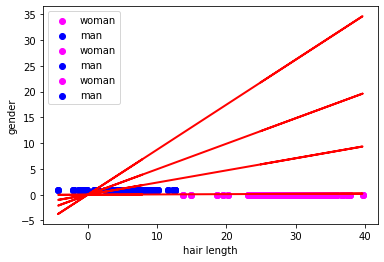

In [17]:
#adaline classificaion:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_data(N):
    
    hair_length_woman = np.random.normal(30, 5, N)
    hair_length_man = np.random.normal(5, 3, N)

    woman_label = np.zeros(N, dtype='int')
    man_label = np.ones(N, dtype='int')

    hair_length = np.concatenate((hair_length_woman, hair_length_man))
    gender = np.concatenate((woman_label, man_label))

    return hair_length, gender

N = 100
X, Y = generate_data(N)

print(X.shape)
print(Y.shape)

#reshape data

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

print(X.shape)
print(Y.shape)

plt.scatter(X[0:N], Y[0:N], c='magenta', label='woman')
plt.scatter(X[N:], Y[N:], c='blue', label='man')

plt.xlabel('hair length')
plt.ylabel('gender')
plt.legend()

M = np.random.uniform(0, 0.9, 3)
# print(M)

plt.scatter(X[0:N], Y[0:N], c='magenta', label='woman')
plt.scatter(X[N:], Y[N:], c='blue', label='man')
plt.xlabel('hair length')
plt.ylabel('gender')
plt.legend()

for m in M:
    
    Y_pred = np.matmul(X, np.array([m]))    
    plt.plot(X, Y_pred, c='red', lw=2)

# m = (XT. X)^-1 * XTY

plt.scatter(X[0:N], Y[0:N], c='magenta', label='woman')
plt.scatter(X[N:], Y[N:], c='blue', label='man')
plt.xlabel('hair length')
plt.ylabel('gender')
plt.legend()

m = np.matmul(np.linalg.inv(np.matmul(X.T, X)),  np.matmul(X.T, Y))
y_pred = np.matmul(X, m)

plt.plot(X, y_pred, c='red', lw=2)

In [18]:
#xor backpropagation neural network:
import numpy as np 
#np.random.seed(0)

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

epochs = 10000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)


#Training algorithm
for _ in range(epochs):
	#Forward Propagation
	hidden_layer_activation = np.dot(inputs,hidden_weights)
	hidden_layer_activation += hidden_bias
	hidden_layer_output = sigmoid(hidden_layer_activation)

	output_layer_activation = np.dot(hidden_layer_output,output_weights)
	output_layer_activation += output_bias
	predicted_output = sigmoid(output_layer_activation)

	#Backpropagation
	error = expected_output - predicted_output
	d_predicted_output = error * sigmoid_derivative(predicted_output)
	
	error_hidden_layer = d_predicted_output.dot(output_weights.T)
	d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

	#Updating Weights and Biases
	output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
	output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
	hidden_weights += inputs.T.dot(d_hidden_layer) * lr
	hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*predicted_output)

Initial hidden weights: [0.58988905 0.57717013] [0.03136248 0.87832125]
Initial hidden biases: [0.87365923 0.54530551]
Initial output weights: [0.7922557] [0.41947738]
Initial output biases: [0.43848491]
Final hidden weights: [3.6221373 5.8960339] [3.60675124 5.81118107]
Final hidden bias: [-5.52571936 -2.41807948]
Final output weights: [-8.04636227] [7.396783]
Final output bias: [-3.31376633]

Output from neural network after 10,000 epochs: [0.06062605] [0.94335638] [0.94362737] [0.06155222]
